In [1]:
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import wrangle

import pydataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_csv('zillow_data.csv')
df = wrangle.preparing_data_zillow(df)
target = df['taxvaluedollarcnt']
df = df.drop(columns =['Unnamed: 0', 'propertylandusedesc'])

/Users/divante/codeup-data-science/regression-exercises/wrangle.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype(int).copy()
/Users/divante/codeup-data-science/regression-exercises/wrangle.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fips = df.fips.astype(int).copy()
/Users/divante/codeup-data-science/regression-exercises/wrangle.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633,296425.0,2005,6941.39,6037
6,3.0,4.0,1620,847770.0,2011,10244.94,6037
7,3.0,2.0,2077,646760.0,1926,7924.68,6037
11,0.0,0.0,1200,5328.0,1972,91.60,6037
14,0.0,0.0,171,6920.0,1973,255.17,6037


In [4]:
train, validate, test = wrangle.split_data(df, target)

In [5]:
X_train = train.drop(columns='taxvaluedollarcnt')

y_train = train.taxvaluedollarcnt


X_validate = validate.drop(columns='taxvaluedollarcnt')

y_validate = validate.taxvaluedollarcnt

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
# print(model.score(X_validate, y_validate))
# print(model.score(X_train, y_train))


In [7]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_validate_scaled = scaler.fit_transform(X_validate)

In [8]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# print(model.score(X_train_scaled, y_train))
# print(model.score(X_validate_scaled, y_validate))

In [10]:
scaler_robust = RobustScaler()
X_train_scaled_Robust = scaler.fit_transform(X_validate)
X_validate_scaled_Robust = scaler.fit_transform(X_validate)

In [11]:
scaler_standard = StandardScaler()
X_validate_scaled_standard = scaler.fit_transform(X_validate)
X_train_scaled_standard = scaler.fit_transform(X_train)

bedroomcnt


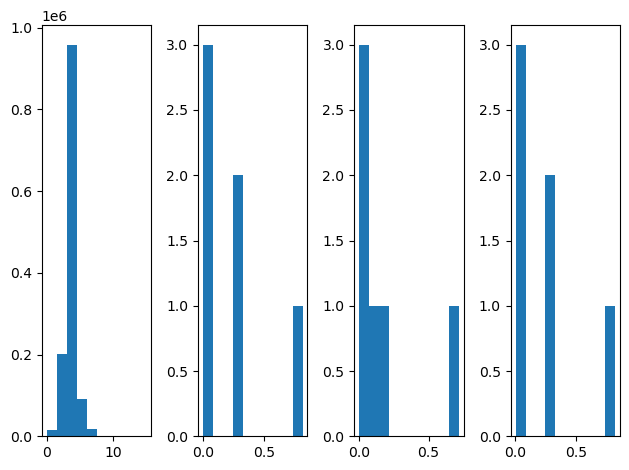

bathroomcnt


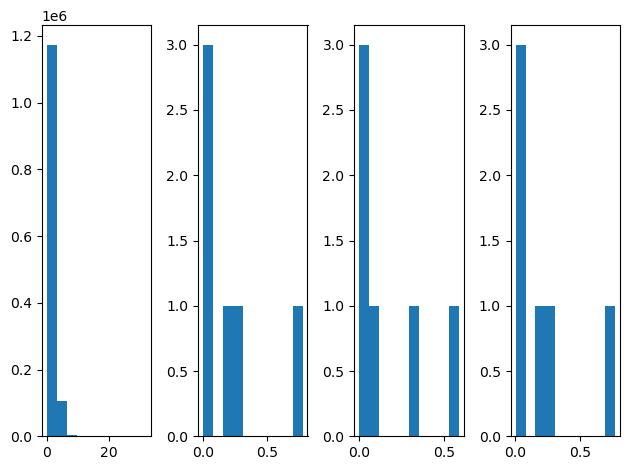

calculatedfinishedsquarefeet


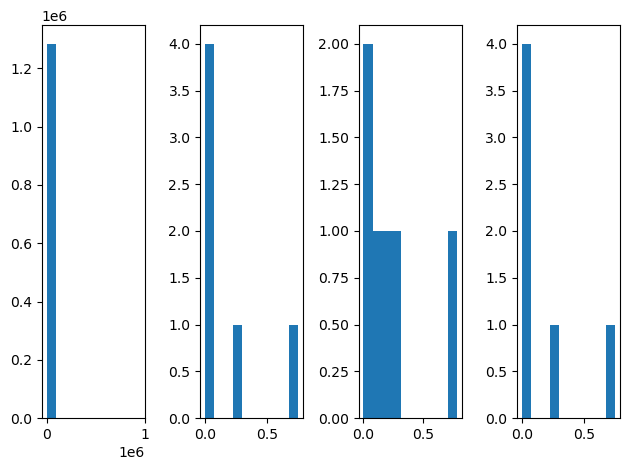

taxvaluedollarcnt


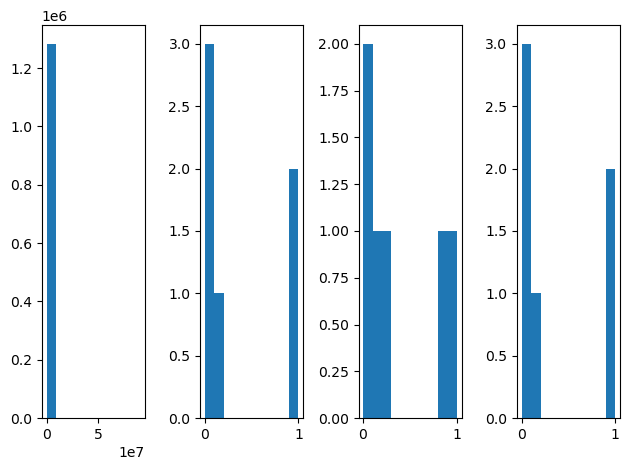

yearbuilt


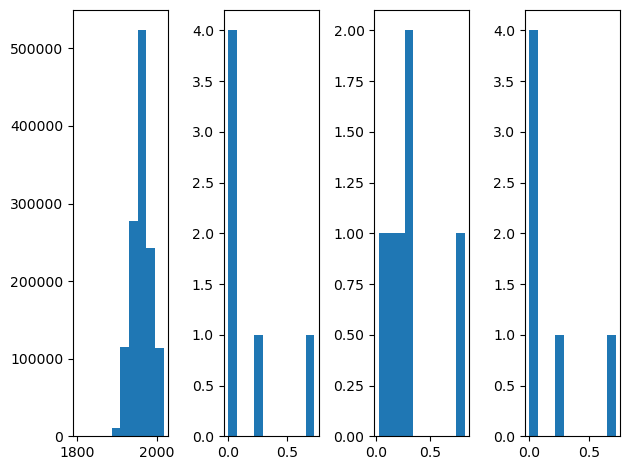

taxamount


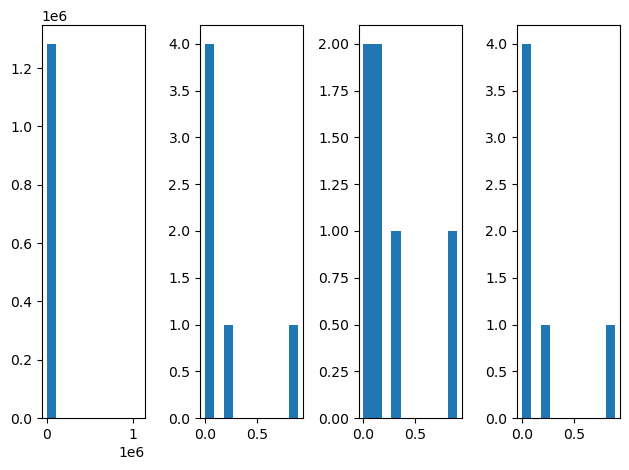

fips


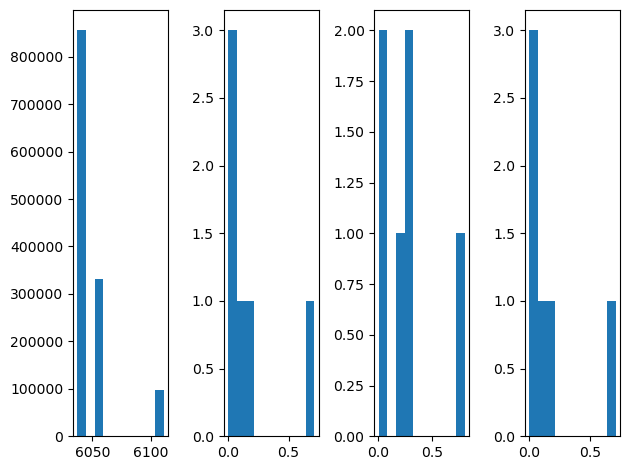

In [12]:
# Apply the scalers we talked about in this lesson to your data and 
# visualize the results for the unscaled and scaled distribution.


#enumerate function in place of count

for count, i in enumerate(train.columns):
    fig, ax = plt.subplots(1, 4)
    print(i)
    ax[0].hist(train[i])
    ax[1].hist(X_train_scaled[count])
    ax[2].hist(X_train_scaled_Robust[count])
    ax[3].hist(X_train_scaled_standard[count])
    fig.tight_layout()
    plt.show()
    
    
    

# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [13]:
scaler_standard_inverse = StandardScaler()
XS = scaler_standard_inverse.fit_transform(X_train)

scaler = scaler_standard_inverse.inverse_transform(XS)

In [14]:
scaler_Robust_inverse = RobustScaler()
scaler_Robust_inverse.fit_transform(X_train)
scaler_Robust_inverse = scaler_Robust_inverse.inverse_transform(X_train)

In [15]:
scaler_min_max_inverse = MinMaxScaler()
scaler_min_max_inverse.fit_transform(X_train)
scaler_min_max_inverse = scaler_min_max_inverse.inverse_transform(X_train)

bedroomcnt


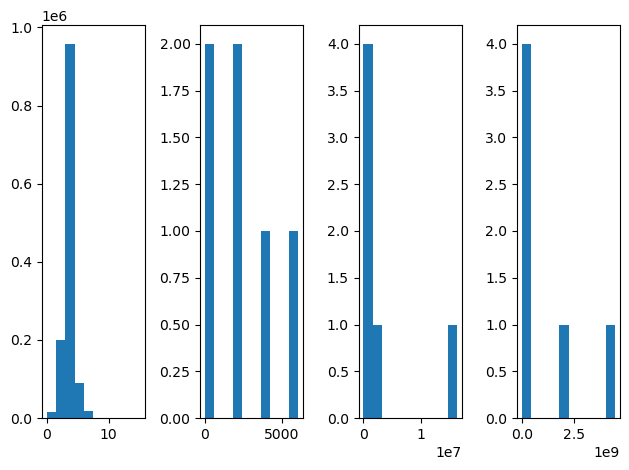

bathroomcnt


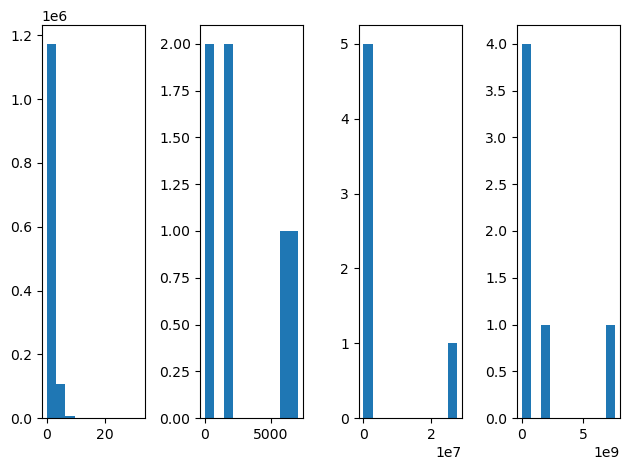

calculatedfinishedsquarefeet


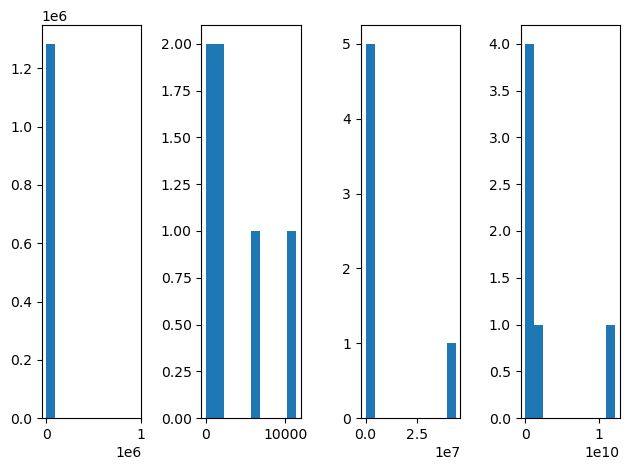

taxvaluedollarcnt


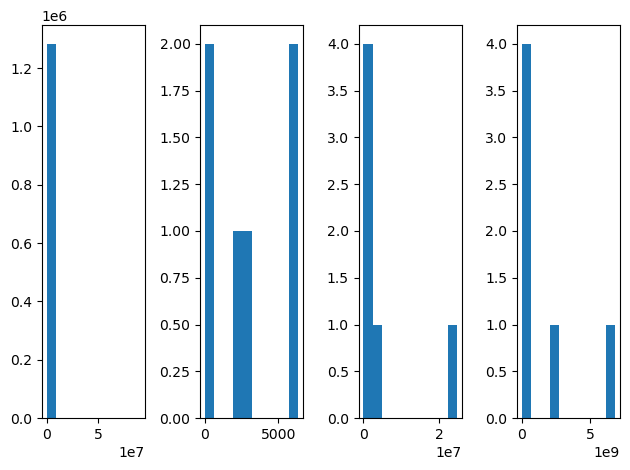

yearbuilt


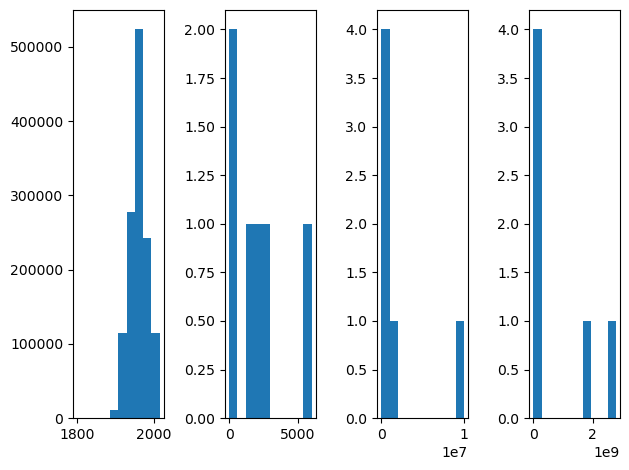

taxamount


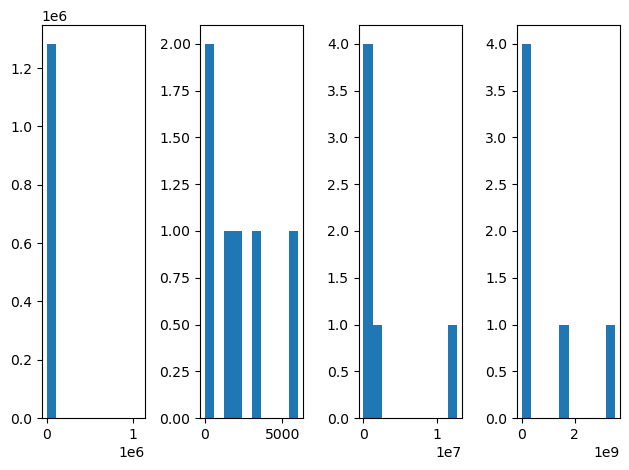

fips


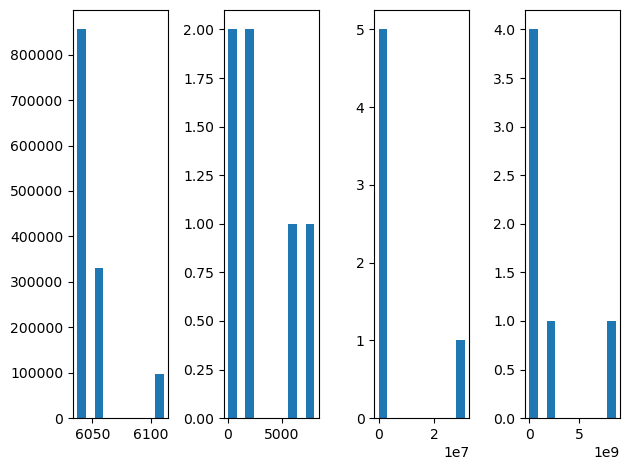

In [16]:
for count, i in enumerate(train.columns):
    fig, ax = plt.subplots(1, 4)
    print(i)
    ax[0].hist(train[i])
    ax[1].hist(scaler[count])
    ax[2].hist(scaler_Robust_inverse[count])
    ax[3].hist(scaler_min_max_inverse[count])
    fig.tight_layout()
    plt.show()

# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

bedroomcnt


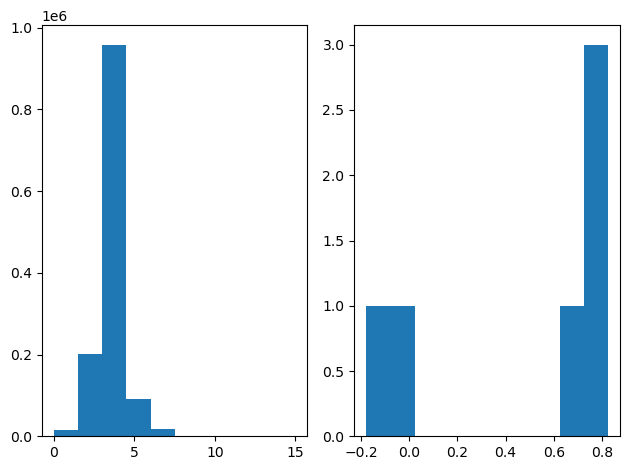

bathroomcnt


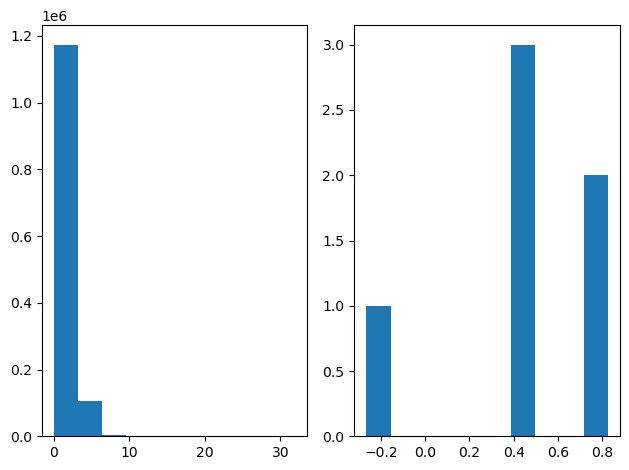

calculatedfinishedsquarefeet


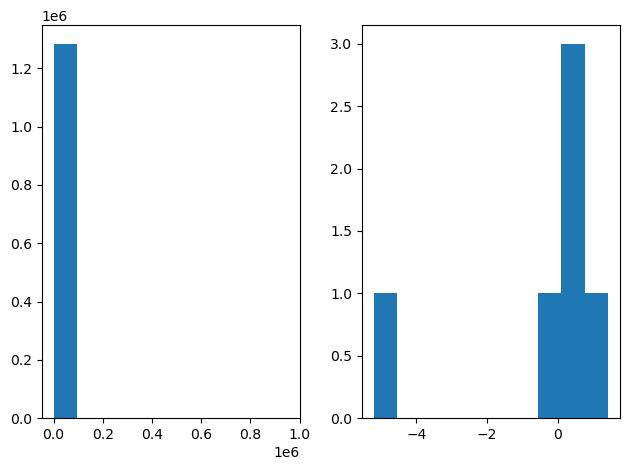

taxvaluedollarcnt


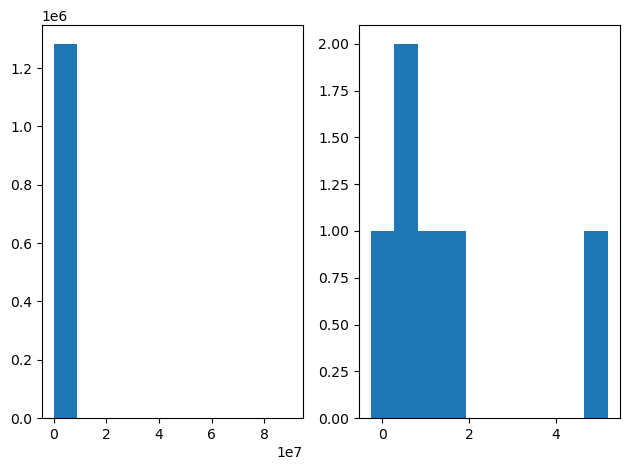

yearbuilt


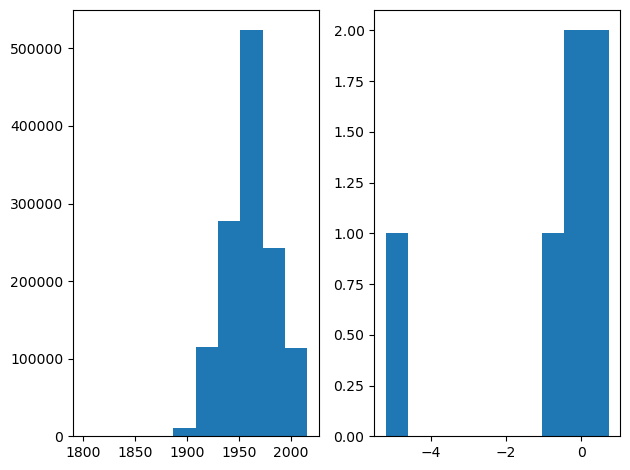

taxamount


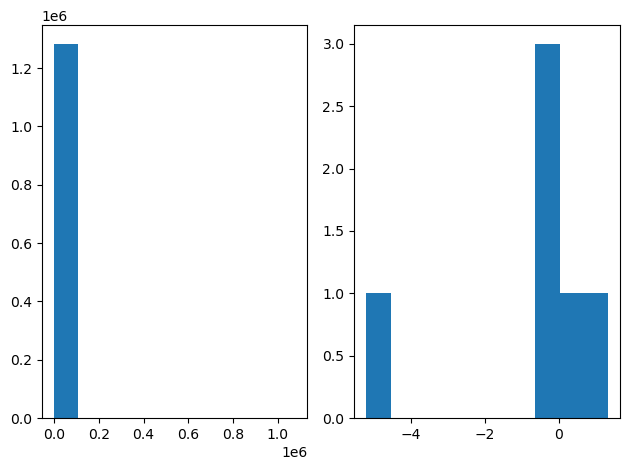

fips


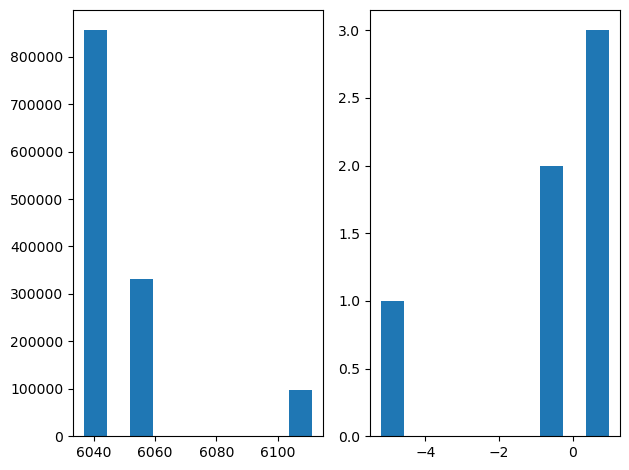

In [17]:
scaler_quantile = QuantileTransformer(output_distribution='normal')
scaler_quantile = scaler_quantile.fit_transform(X_train)


for count, i in enumerate(train.columns):
    fig, ax = plt.subplots(1, 2)
    print(i)
    ax[0].hist(train[i])
    ax[1].hist(scaler_quantile[count])
    fig.tight_layout()
    
    plt.show()

# Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

bedroomcnt


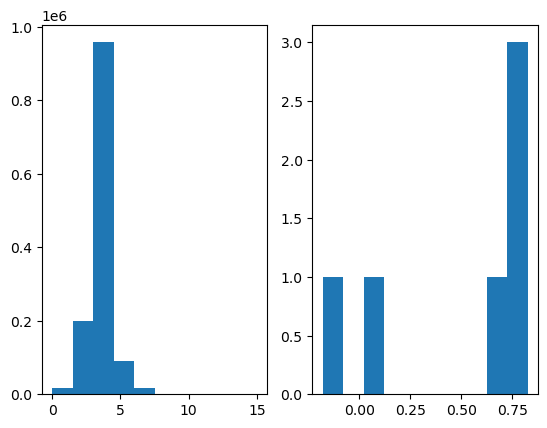

bathroomcnt


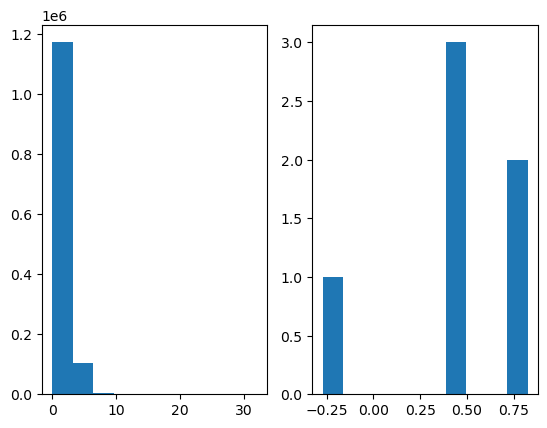

calculatedfinishedsquarefeet


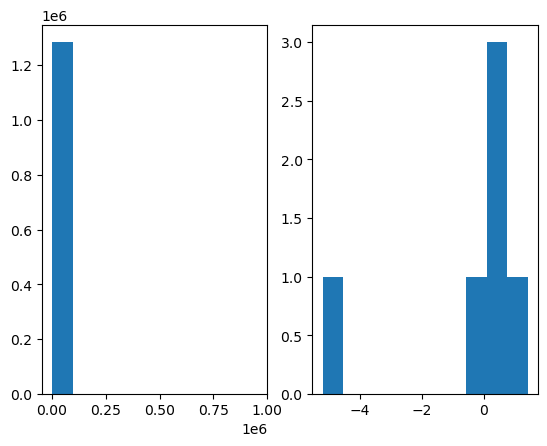

taxvaluedollarcnt


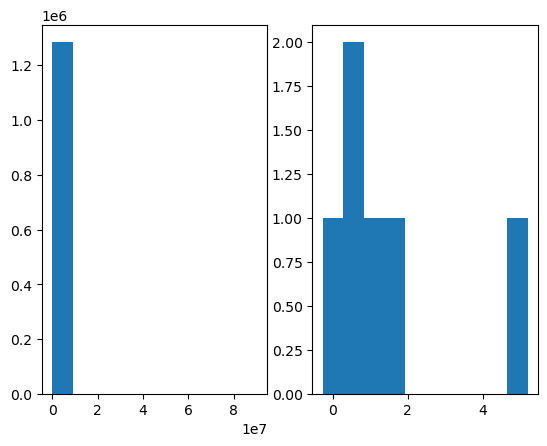

yearbuilt


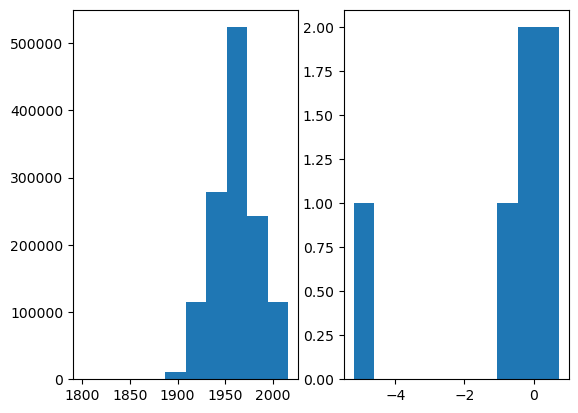

taxamount


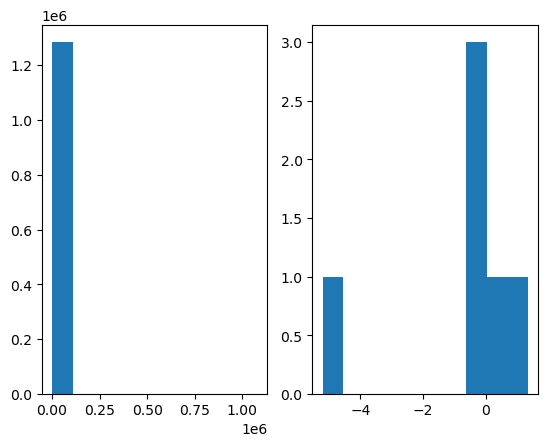

fips


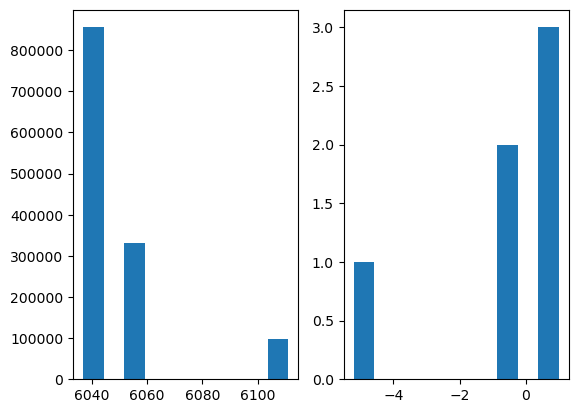

bedroomcnt


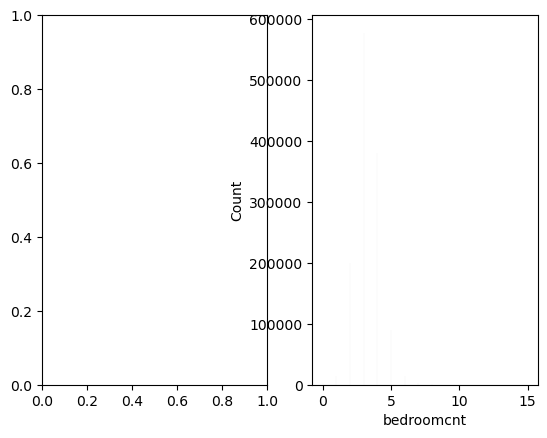

bathroomcnt


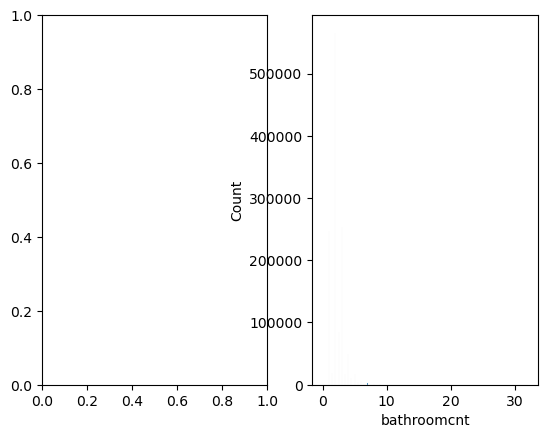

calculatedfinishedsquarefeet


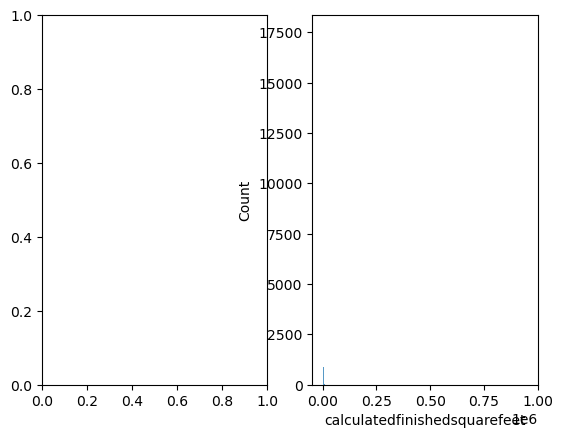

taxvaluedollarcnt


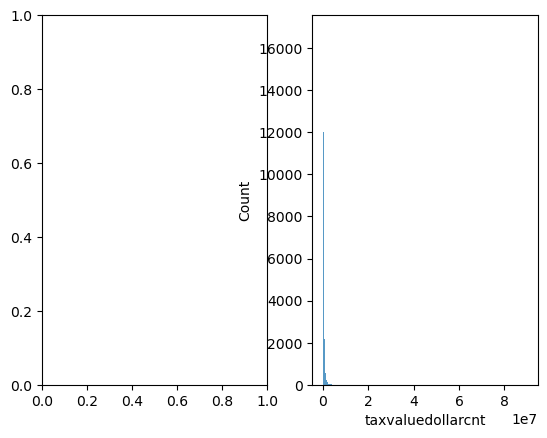

yearbuilt


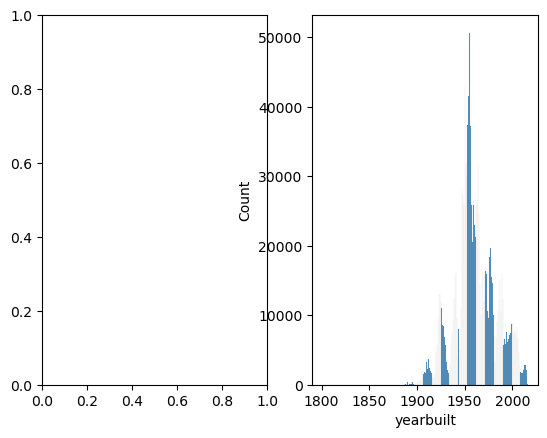

taxamount


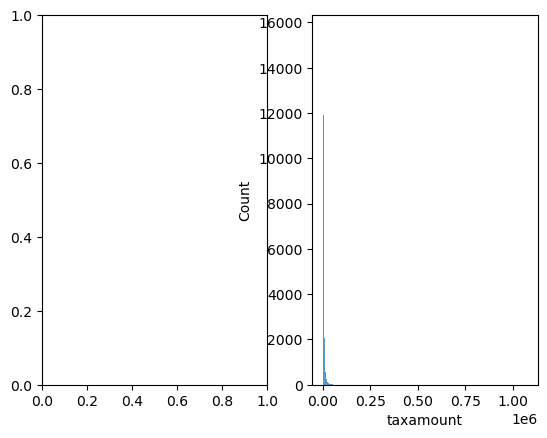

fips


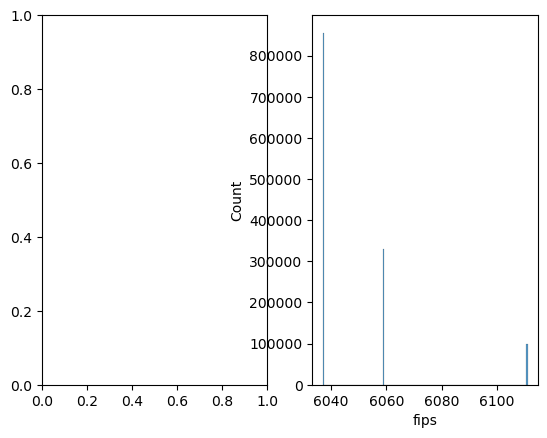

In [20]:
scaler_quantile = QuantileTransformer(output_distribution='normal')
scaler_quantile = scaler_quantile.fit_transform(X_train)


for count, i in enumerate(train.columns):
    fig, ax = plt.subplots(1, 2)
    print(i)
    ax[0].hist(train[i])
    ax[1].hist(scaler_quantile[count])
    
    plt.show()
    


### The charts are slightly different

# Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

bedroomcnt


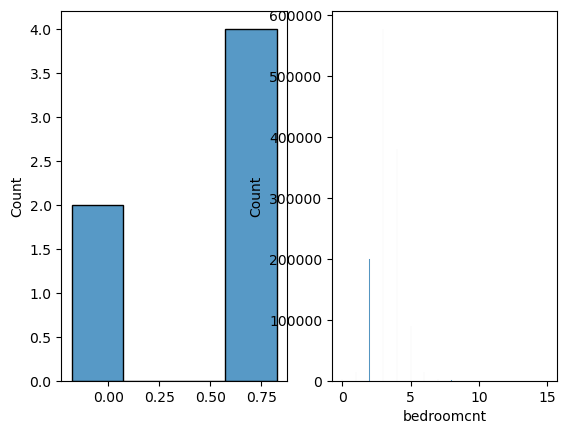

bathroomcnt


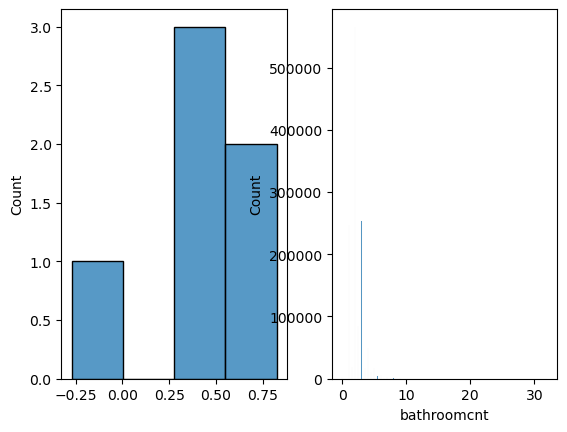

calculatedfinishedsquarefeet


In [ ]:
for count, i in enumerate(train.columns):
    fig, ax = plt.subplots(1, 2)
    print(i)
    sns.histplot(ax=ax[1], x=train[i])
    sns.histplot(ax=ax[0], x=scaler_quantile[count])
    fig.tight_layout()
    plt.show()